In [1]:
#Import required modules for the problem
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
#Extract data
df=pd.read_excel('pima_indian_diabetes_dataset.xlsm',names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

# Exploratory data analysis

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.shape)
print(df.groupby('Outcome').size())

(768, 9)
Outcome
0    500
1    268
dtype: int64


In [4]:
print(df.info())
#Note that there are no null values but there are spaces in few variables. Let us replace spaces with np.nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
#If any of the feature contains spaces, then fill with np.nan and convert the Object type array to float
for col_nm in df.columns:
    if df[col_nm].dtype == 'O':
        print(col_nm, 'contains', df[col_nm].str.isspace().sum(),'spaces')
        df[col_nm]=pd.to_numeric(df[col_nm],errors='coerce') # If ‘coerce’, then invalid parsing will be set as NaN

In [6]:
#Missing or Null Data points
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
#Unexpected Outliers

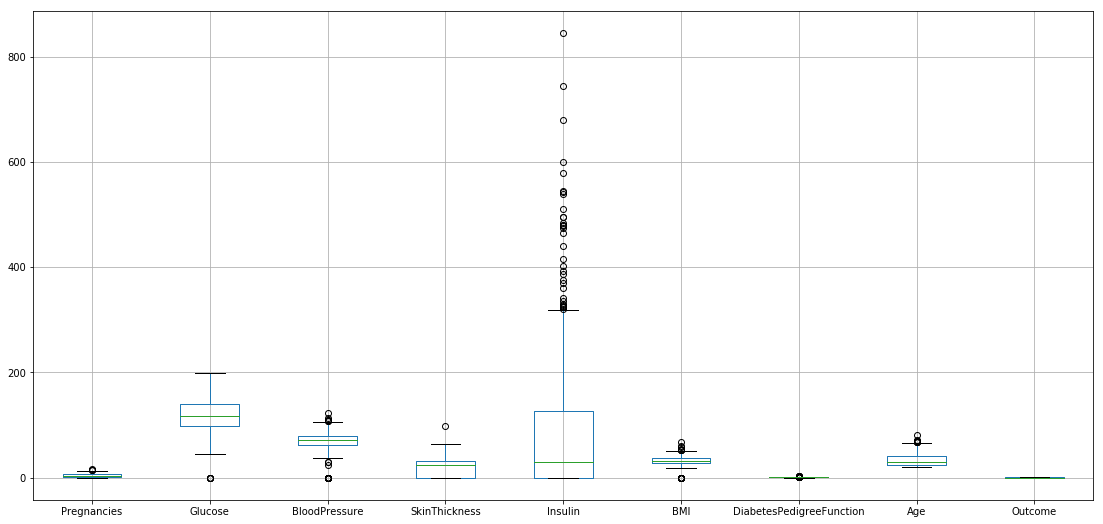

In [9]:
df.boxplot(figsize=(19,9))
plt.show()

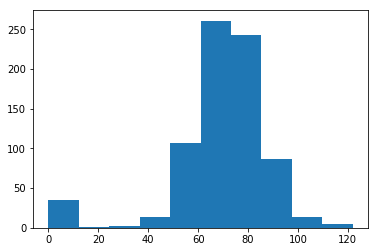

Outcome
0    19
1    16
dtype: int64


In [21]:
plt.hist(df['BloodPressure'])
plt.show()
print(df[df.BloodPressure == 0].groupby('Outcome').size())

#By observing the data we can see that there are 0 values for blood pressure. 
#And it is evident that the readings of the data set seems wrong because a living person cannot have diastolic blood pressure 
#of zero. By observing the data we can see 35 counts where the value is 0.

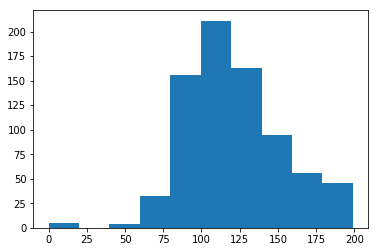

Outcome
0    3
1    2
dtype: int64


In [20]:
plt.hist(df['Glucose'])
plt.show()
print(df[df.Glucose == 0].groupby('Outcome').size())

#Glucose level 0 is an invalid reading.By observing the data we can see 5 counts where the value is 0.

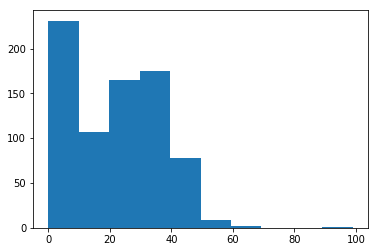

Outcome
0    139
1     88
dtype: int64


In [19]:
plt.hist(df['SkinThickness'])
plt.show()
print(df[df.SkinThickness == 0].groupby('Outcome').size())

#For normal people skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0 : 227.

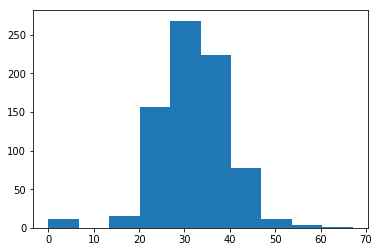

Outcome
0    9
1    2
dtype: int64


In [18]:
plt.hist(df['BMI'])
plt.show()
print(df[df.BMI == 0].groupby('Outcome').size())

#BMI : Should not be 0 or close to zero unless the person is really underweight which could be life threatening.

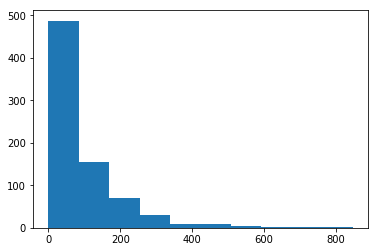

Outcome
0    236
1    138
dtype: int64


In [22]:
plt.hist(df['Insulin'])
plt.show()
print(df[df.Insulin == 0].groupby('Outcome').size())

In [23]:
#By looking at the above points we can coclude that this dataset is incomplete with lot of missing/wrong values.
#We can remove rows with these cases but that would mean losing valuable information
#Put average/mean values : This might work for some data sets, but in our case putting a mean value to the blood pressure column 
#would send a wrong signal to the model.
# Since that dataset is incomplete let me remove the rows with “BloodPressure”, “BMI” and “Glucose” are zero.

In [24]:
df_mod=df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)].reset_index(drop=True)

In [25]:
print(df_mod.shape)

(724, 9)


In [26]:
print(df_mod.head())
#Our modified data set contains 725 onservations. Lets impute the missing values (NaN)
#Before that we need to check for outliers. If there are many bad outliers in a variable then better to impute with median than 
#mean. If there are no outliers then we can impute with mean.
print(df_mod.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


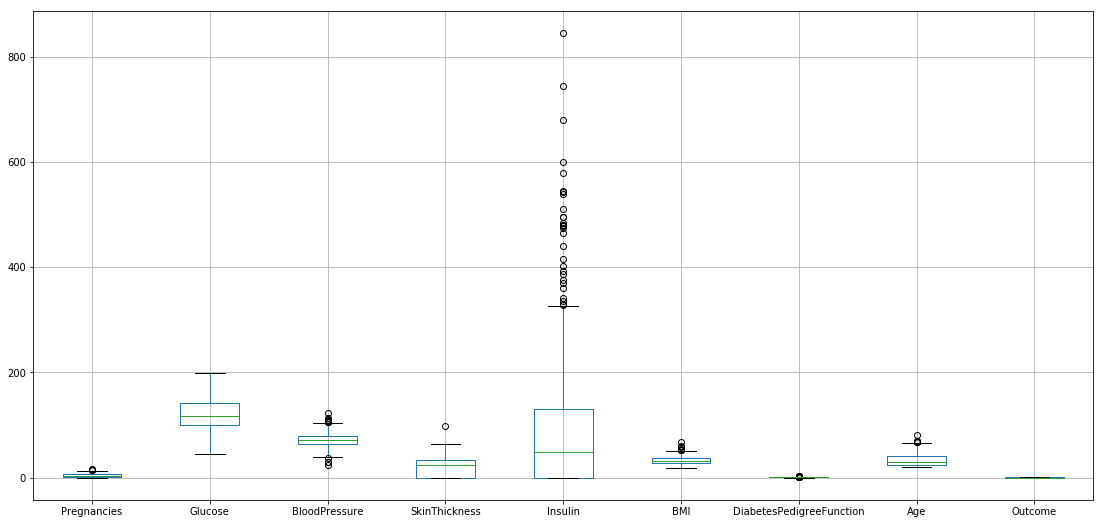

In [27]:
df_mod.boxplot(figsize=(19,9))
plt.show()

In [28]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 9 columns):
Pregnancies                 724 non-null int64
Glucose                     724 non-null int64
BloodPressure               724 non-null int64
SkinThickness               724 non-null int64
Insulin                     724 non-null int64
BMI                         724 non-null float64
DiabetesPedigreeFunction    724 non-null float64
Age                         724 non-null int64
Outcome                     724 non-null int64
dtypes: float64(2), int64(7)
memory usage: 51.0 KB


In [29]:
#There many outliers in 'Insulin','BloodPressure','DiabetesPedigreeFunction'. let me impute outliers with median.
columns=list(df_mod)
for col_nm in columns[:-1]:
    L=df_mod[col_nm].quantile(0.25)-(1.5*(df_mod[col_nm].quantile(0.75)-df_mod[col_nm].quantile(0.25)))
    U=df_mod[col_nm].quantile(0.75)+(1.5*(df_mod[col_nm].quantile(0.75)-df_mod[col_nm].quantile(0.25)))
    print(df_mod[col_nm].loc[np.where((df_mod[col_nm]< L) | (df_mod[col_nm] > U))])  #outliers in each feature
    df_mod.loc[(df_mod[col_nm]< L) | (df_mod[col_nm] > U),col_nm] = df_mod[col_nm].median()

80     15
150    17
282    14
427    14
Name: Pregnancies, dtype: int64
Series([], Name: Glucose, dtype: int64)
15      30
40     110
76     108
98     122
117     30
167    110
339    108
514    110
561     24
563     38
618    106
622    106
632    106
650    114
Name: BloodPressure, dtype: int64
544    99
Name: SkinThickness, dtype: int64
7      543
11     846
50     342
103    495
144    485
175    495
208    478
215    744
218    370
234    680
235    402
245    375
270    545
280    360
347    465
368    415
385    579
391    474
451    328
456    480
539    330
549    600
605    440
615    540
654    480
663    335
666    387
671    392
709    510
Name: Insulin, dtype: int64
112    53.2
117    55.0
167    67.1
234    52.3
286    52.9
418    59.4
633    57.3
Name: BMI, dtype: float64
4      2.288
10     1.441
36     1.390
42     1.893
54     1.781
92     1.222
138    1.400
176    1.321
206    1.224
215    2.329
230    1.318
232    1.213
246    1.353
276    1.224
291    1.391
313 

In [30]:
print(df_mod.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     0.379  33.0        1  


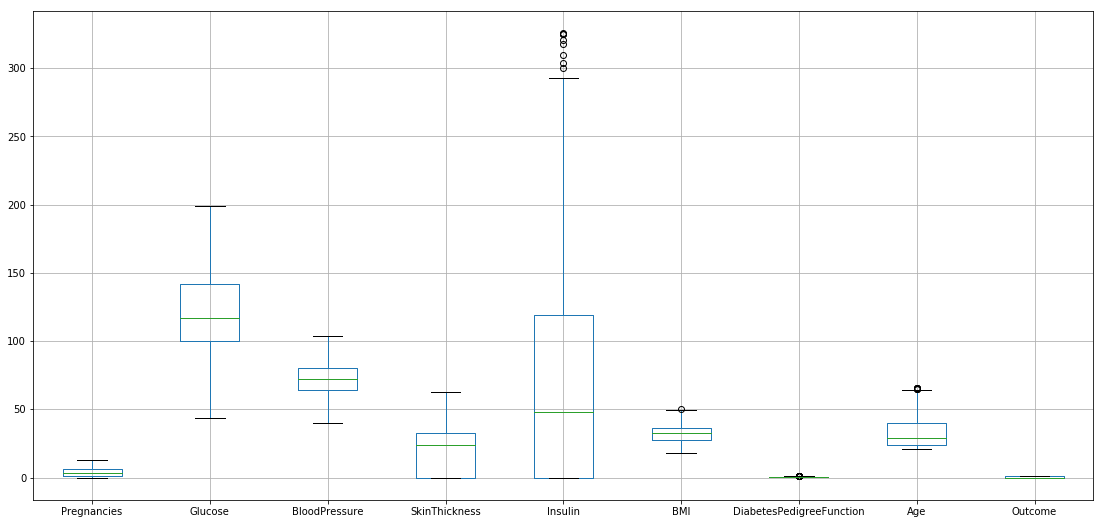

In [31]:
#Now we have imputed outliers with median. Let us use boxplot and see the effect.
df_mod.boxplot(figsize=(19,9))
plt.show()

In [32]:
#We can replace the missing values with mean value of the variable for corresponding Outcome. 
df1=df_mod.groupby('Outcome').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [33]:

X_train, X_test, Y_train, Y_test = train_test_split(df1.iloc[:,:-1], df1.iloc[:,8], test_size = 0.2, random_state = 0)

In [34]:
train=X_train.join(Y_train)
train1=train.reset_index(drop=True)
train1.groupby('Outcome').size()

Outcome
0    385
1    194
dtype: int64

In [35]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
Pregnancies                 579 non-null float64
Glucose                     579 non-null float64
BloodPressure               579 non-null float64
SkinThickness               579 non-null float64
Insulin                     579 non-null float64
BMI                         579 non-null float64
DiabetesPedigreeFunction    579 non-null float64
Age                         579 non-null float64
Outcome                     579 non-null int64
dtypes: float64(8), int64(1)
memory usage: 40.8 KB


# Prediction using Logistic regression

In [36]:
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\EJ325343\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
predicted=model.predict(X_test)

In [38]:
cm=confusion_matrix(Y_test,predicted,labels=[0,1])

In [39]:
cm_df=pd.DataFrame(cm,index=['Negative', 'Positive'],columns=['Negative', 'Positive'])

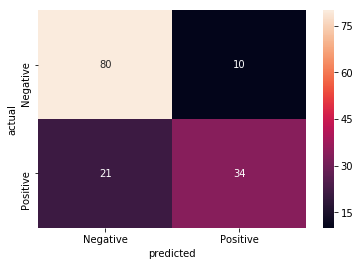

In [40]:
plt.figure()
ax=sns.heatmap(cm_df,annot=True)
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()